# Laptop Price Prediction

In [1180]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

## Data Pre-Processing

In [1181]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_Rupees,Price_in_Ringgits,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,4068.584942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,2730.044822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1746.252000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,7706.134152,NaN,NaN,NaN,NaN,NaN,Conversion Rate as of 11 Jan 2022,NaN
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,5477.461056,NaN,NaN,NaN,NaN,NaN,INR to MYR,0.057


In [1182]:
# Removing unwanted columns
df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_in_Ringgits']]

# Changing Price_in_Ringgits to Price
df = df.rename(columns = {"Price_in_Ringgits" : "Price"})

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,4068.584942
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2730.044822
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1746.252000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,7706.134152
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,5477.461056


### Checking for Null Values and Duplicates

In [1183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [1184]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [1185]:
df.duplicated().sum()

29

### Identifying Categorical and Continuous Data

In [1186]:
# Identifying Categorical Data
cat_data = [col for col in df.columns if df[col].dtype=='O']
cat_data

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [1187]:
# Identifying Numeric Data
cont_data = [col for col in df.columns if df[col].dtype!='O']
cont_data

['Inches', 'Price']

In [1188]:
# Function to identify Unique Values
def unique_values(col):
    print(f'The {col} column has ', df[col].unique(), ' Unique values')
    
# Count the number of Values in Specified Column
def value_counts(col):
    print(f'The {col} column has ', df[col].value_counts(), ' total values')

In [1189]:
for col in df.columns:
    unique_values(col)
    print('-' * 75)

The Company column has  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']  Unique values
---------------------------------------------------------------------------
The TypeName column has  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']  Unique values
---------------------------------------------------------------------------
The Inches column has  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]  Unique values
---------------------------------------------------------------------------
The ScreenResolution column has  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD

RAM, Memory & Weight could be converted to numeric values by removing the strings. This would be performed by executing the following steps below:

In [1190]:
# Removing 'GB' from RAM column
df['Ram'] = df['Ram'].astype(str).str.replace('GB','')

# Converting RAM from String to Int
df['Ram'] = df['Ram'].astype(int)

# Removing 'kg' from Weight column
df['Weight'] = df['Weight'].astype(str).str.replace('kg','')

# Converting Weight from String to Float
df['Weight'] = df['Weight'].astype(float)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056


In [1191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


## Exploratory Data Analysis

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

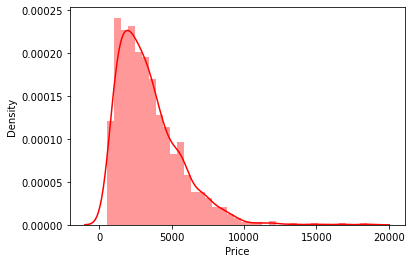

In [1192]:
# Checking the distribution of 'Price' column
sn.distplot(df['Price'], color='red')

In [1193]:
# Function to plot countplots
def draw_plot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col], palette='plasma')
    plt.xticks(rotation='vertical')

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tuans\anaconda3\lib\si

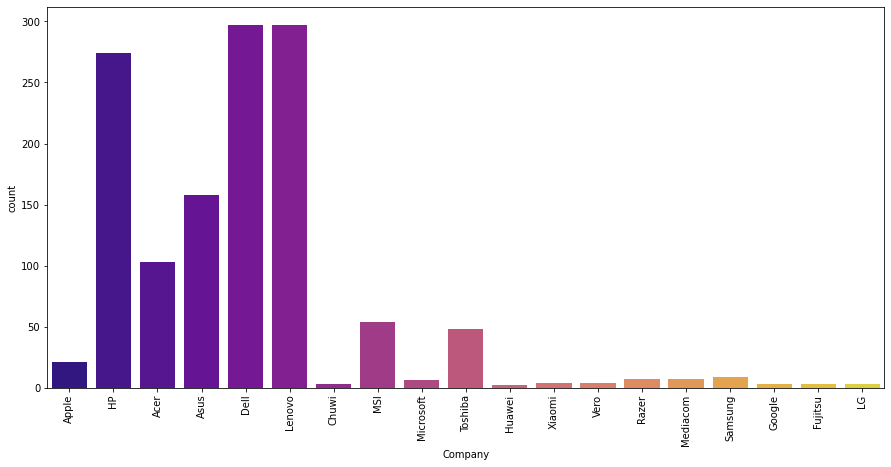

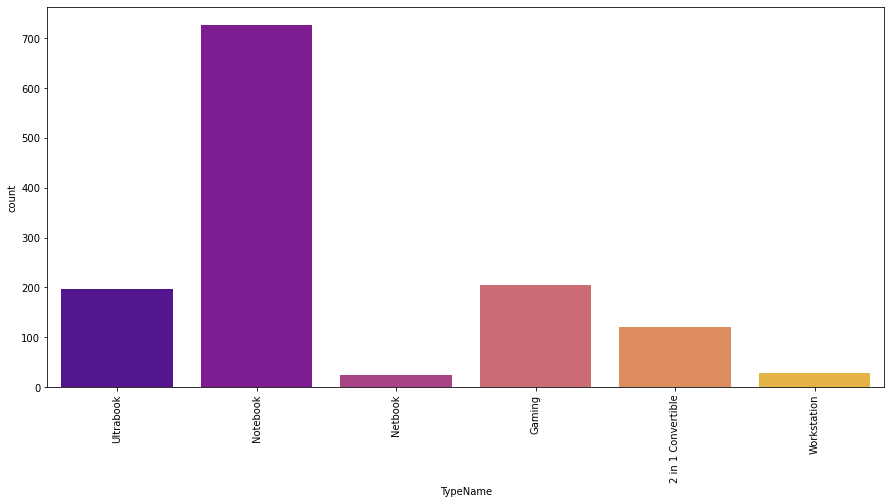

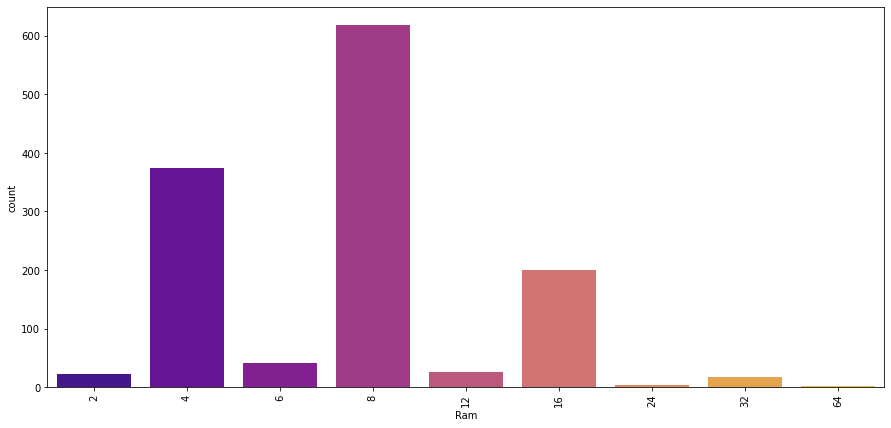

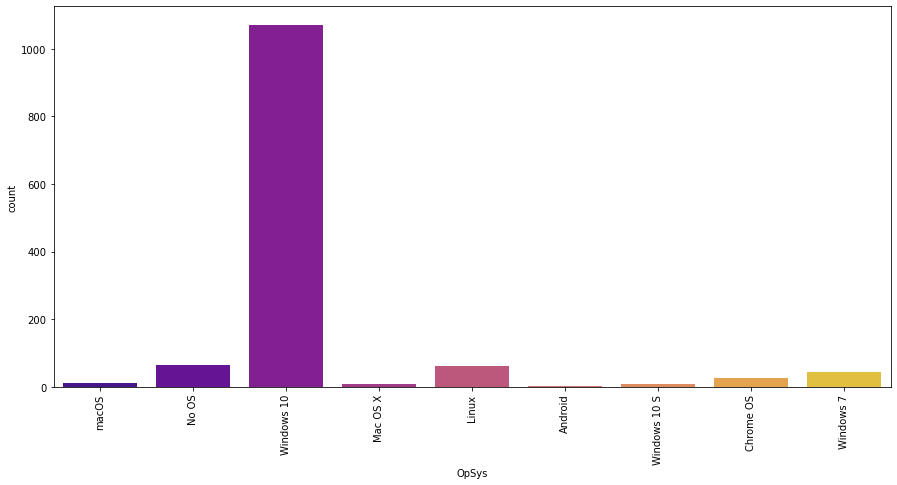

In [1194]:
# Plotting Countplots for Categorical Variables
view_cat = ['Company', 'TypeName', 'Ram', 'OpSys']

for col in view_cat:
    draw_plot(col)

Based on the graphs plotted above, Dell, Lenovo, & HP are the most common laptop brands within the dataset. The most common type of laptops are Notebooks where the most frequently repeated RAM is 8GB and Operating System being Windows 10.

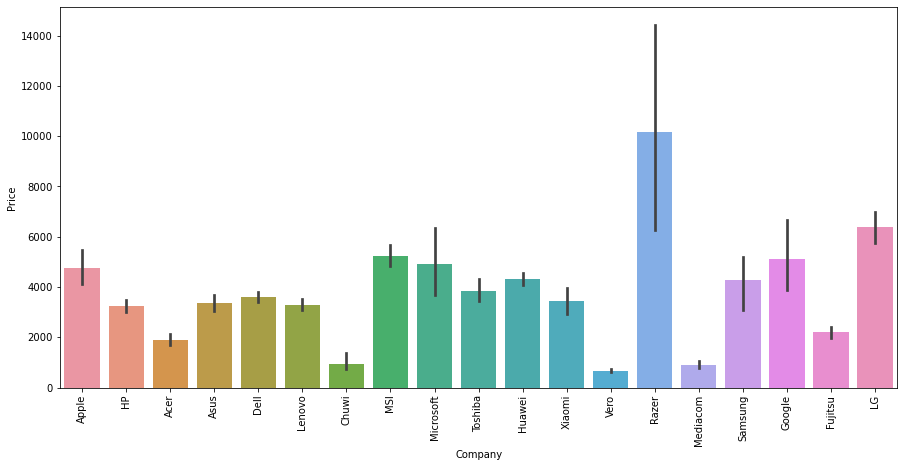

In [1195]:
# Identifying the Average Price of Laptops based on Brand
plt.figure(figsize=(15,7))
sn.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

The graph above allows us to get a better understanding of the average prices of the laptops based on the brand. The price range may vary based on specifications and demand.

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TypeName', ylabel='count'>

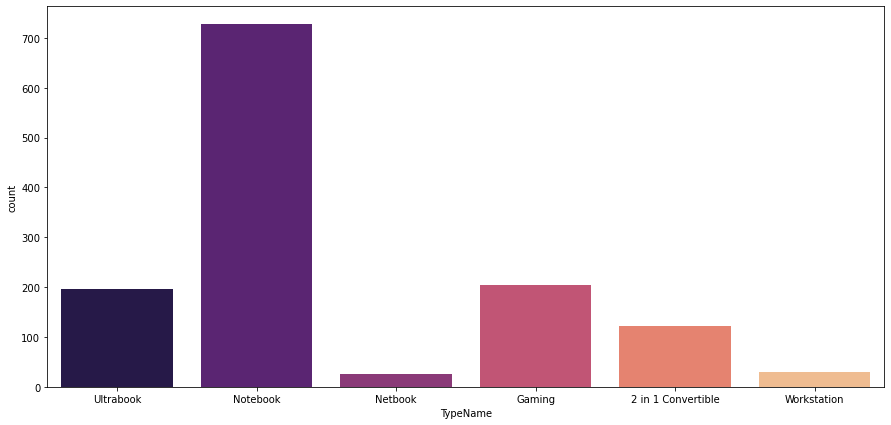

In [1196]:
# Identifying the various types of laptops within the dataset
plt.figure(figsize=(15,7))
sn.countplot(df['TypeName'], palette='magma')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

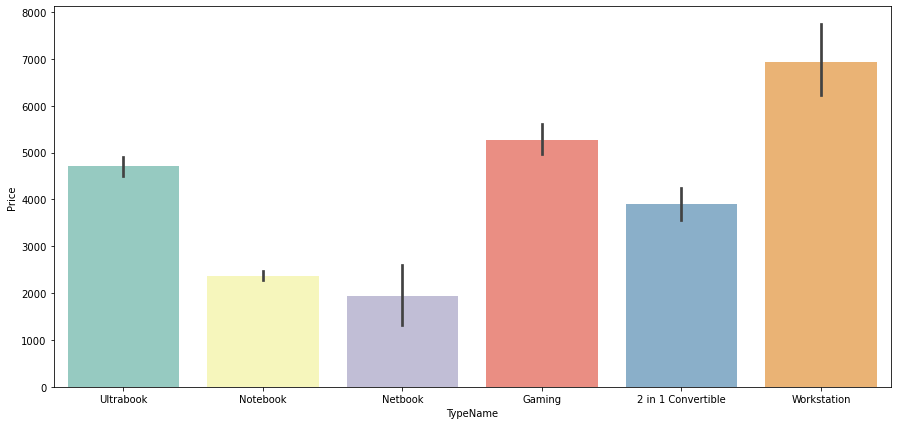

In [1197]:
# Identifying Laptop Price based on Type
plt.figure(figsize=(15,7))
sn.barplot(x=df['TypeName'], y=df['Price'], palette='Set3')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

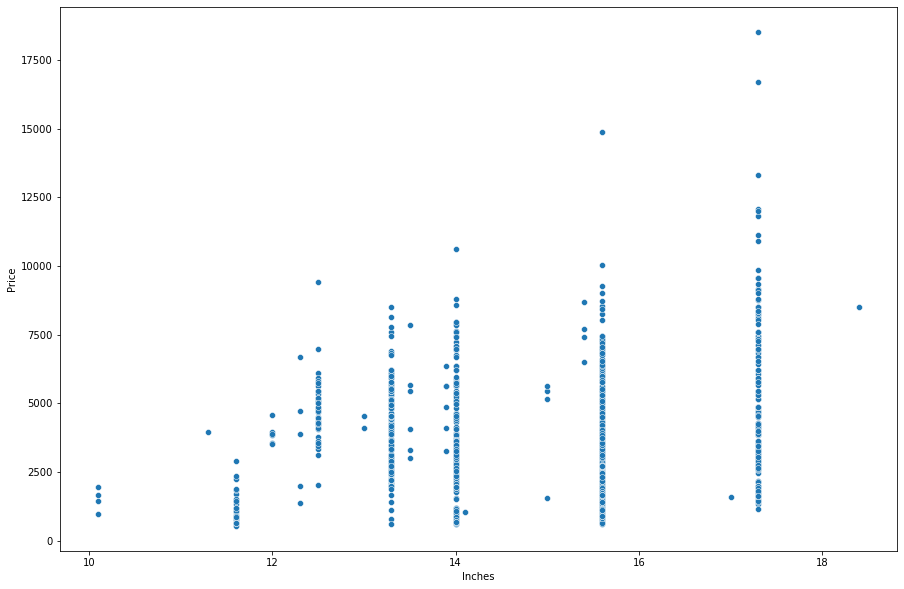

In [1198]:
# Identifying the Variation of Laptop Sizes based on Price
plt.figure(figsize=(15,10))
sn.scatterplot(x=df['Inches'], y=df['Price'])

In [1199]:
# Identifying the number of laptops with each Screen Resolution
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [1200]:
# Creating 'TouchScreen' Column with 1 if Touchscreen and 0 if Not Touchscreen
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1
                                                if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0


In [1201]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,1937.58048,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,4552.40304,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,695.46384,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,2320.23744,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,1120.63824,0


In [1202]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
721,HP,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,2540.720736,1
905,LG,Ultrabook,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.08,6374.579040,1
852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,2626.970400,0
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,7279.593120,1
556,Mediacom,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4,32GB Flash Storage,Intel HD Graphics,Windows 10,1.35,774.424800,0


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TouchScreen', ylabel='count'>

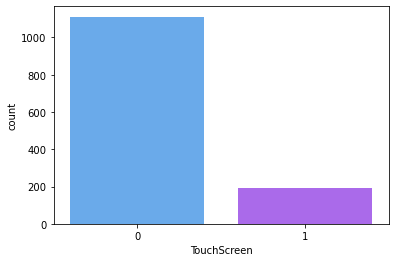

In [1203]:
# Identifying number of touchscreen laptops
sn.countplot(df['TouchScreen'], palette='cool')

As illustrated above, about 200 of the laptops within the dataset is Touchscreen.

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

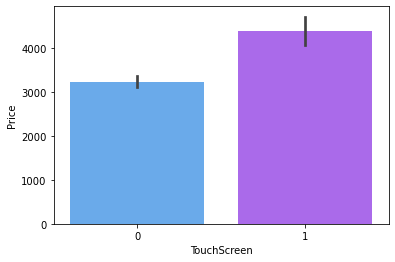

In [1204]:
# Identifying price of touchscreen and non-touchscreen laptops
sn.barplot(x=df['TouchScreen'], y=df['Price'], palette='cool')

As shown above, the prices for Touchscreen laptops is over 4000RM which is significantly higher than laptops without touchscreen feature at around 3200RM.

In [1205]:
# Creating 'IPS' Column with 1 if laptop has an IPS Panel and 0 if Not
df['IPS'] = df['ScreenResolution'].apply(lambda element:1
                                        if 'IPS' in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
265,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,2426.531040,1,0
95,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.50,2572.305120,1,1
127,Asus,Notebook,14.0,1366x768,AMD E-Series 6110 1.5GHz,4,64GB SSD,AMD Radeon R2,Windows 10 S,1.65,844.244510,0,0
818,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.36,7607.645539,0,1
26,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,128GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,3337.619040,0,0


<AxesSubplot:xlabel='IPS', ylabel='Price'>

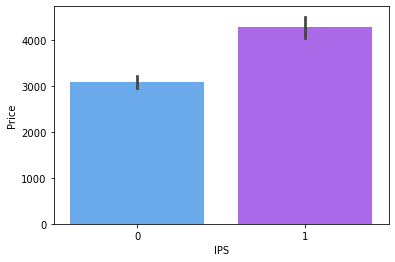

In [1206]:
# Identifying price of laptops with and without IPS Panels
sn.barplot(x=df['IPS'], y=df['Price'], palette='cool')

### Extracting Width and Height from Resolution column

In [1207]:
# Splitting Resolution Column into 2 Columns based on Width and Height
split_res = df['ScreenResolution'].str.split('x', n=1, expand=True)
split_res.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [1208]:
# Merging 'split_res' into df
df['Width'] = split_res[0]
df['Height'] = split_res[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Width,Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,IPS Panel Retina Display 2560,1600


Since Width consists of Text alongside the Width, We shall use RegEx to split the width from the Text. This is done as follows:

In [1209]:
# Replacing ',' with '' and finding numbers within the string
df['Width'] = df['Width'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Width,Height
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,2560,1600


In [1210]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Width,Height
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,868.570560,0,0,1366,768
908,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,2396.161440,0,1,1920,1080
652,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,4403.288304,0,0,1920,1080
437,Google,Ultrabook,12.3,Touchscreen 2400x1600,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Chrome OS,1.10,6678.275040,1,0,2400,1600
844,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,Windows 7,1.54,5679.115200,0,0,1920,1080


In [1211]:
# Converting Width and Height to int
df['Width'] = df['Width'].astype('int')
df['Height'] = df['Height'].astype('int')

In [1212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Width             1303 non-null   int32  
 14  Height            1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


## Identifying Correlation

<AxesSubplot:>

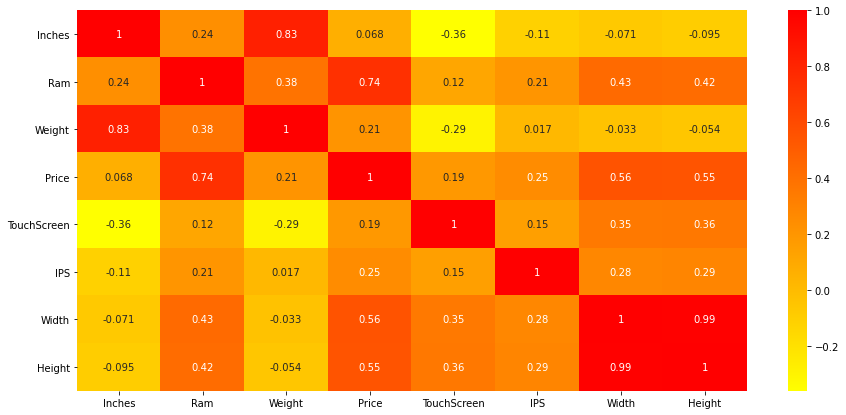

In [1213]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='autumn_r')

The heatmap above shows how correlated the features are with each other. Some insights retrieved could be the following:

Based on the heatmap above, we can conclude that the width and height are heavily correlated. This could be due to the specified aspect ratios.

Other features that are correlated are Weight and Inches, this could be due to the fact that the devices are often heavier as screen size increases.

Some other feature that impact the Price are discussed below:

In [1214]:
df.corr()['Price'].sort_values(ascending=False)

Price          1.000000
Ram            0.743007
Width          0.556529
Height         0.552809
IPS            0.252208
Weight         0.210370
TouchScreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

As shown above, some of the factors that impact the price are **RAM**, **Width** & **Height**. These features have a strong positive correlation with Price.

As Width & Height are highly correlated would have the same amount of contribution in the Price. In order to get a more accurate prediction, the 'Inches', 'Height' & 'Width' columns would have to be used to create a New column called **PPI (Pixels Per Inch)**. 

$$
    PPI(Pixels Per Inch) = \frac{\sqrt{Width^2 + Height^2}}{inches}
$$

In [1215]:
# Creating new Column by applying the formula above
df['PPI'] = (((df['Width']**2 + df['Height']**2)) **0.5 / df['Inches'])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Width,Height,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,2560,1600,226.983005


<AxesSubplot:>

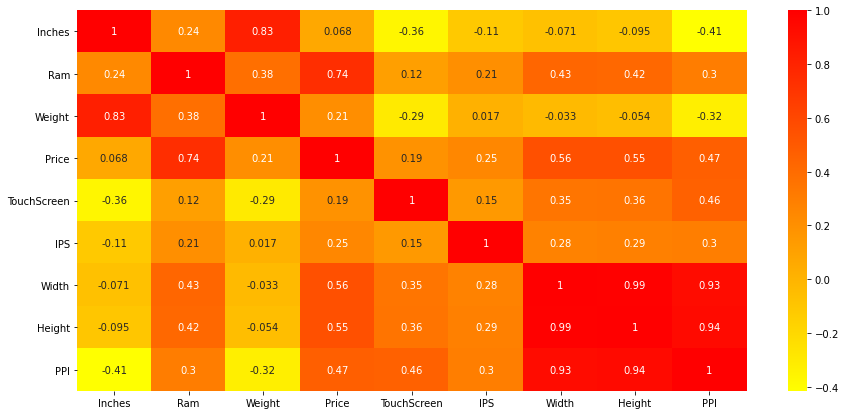

In [1216]:
# Identifying Correlation after calculating PPI 
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(), annot=True, cmap='autumn_r')

In [1217]:
# Dropping Unnecessary Columns
df.drop(columns=['ScreenResolution', 'Inches', 'Width', 'Height'], inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005


In [1218]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
1279,Lenovo,Notebook,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,2730.22704,0,1,141.211998
733,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.40,1697.66064,0,0,100.454670
129,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.50,2818.29888,0,0,127.335675
843,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.18,2168.35907,0,0,100.454670
792,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,5982.81120,1,1,165.632118


Since **CPU** column consists of text data, this would have to be processed in order to increase the efficiency of the Model being developed.

In [1219]:
print(df['Cpu'].unique())

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700 3GHz' 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Atom x5-Z8550 1.44GHz' 'Intel Celeron Dual Core N3060 1.6GHz'
 'Intel Core i5 1.3GHz' 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 620

As most processors within the dataset are manufactured by Intel, this could further be classified into **i3**, **i5**, **i7**. Alongside this, the second leading processor manufacturer is AMD, hence AMD processors would be classified into another category known as **AMD**. Processors that don't fall under these categories would be classified as **Other**

In [1220]:
# Extract Processor into new 'Processor' Column
df['Processor'] = df['Cpu'].apply(lambda text:' '.join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5


In [1221]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
197,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49,2912.444640,0,0,165.632118,Intel Core i5
220,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,2.20,2057.084856,0,0,141.211998,Intel Core i5
942,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.23,1879.878240,0,0,100.454670,Intel Core i5
514,Xiaomi,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,1.95,4251.592152,0,1,141.211998,Intel Core i7
947,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 920MX,No OS,2.20,2080.317600,0,0,141.211998,Intel Core i7


### Classifying Processors

In [1222]:
# Function to Classify Processors
def classify_processor(text):
    
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    
    else:
        if text.split()[0] == 'AMD':
            return 'AMD Processor'
        
        else:
            return 'Other'

In [1223]:
df['Processor'] = df['Processor'].apply(lambda text: classify_processor(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5


In [1224]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
327,Asus,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,3188.504304,0,0,141.211998,Intel Core i7
467,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,2305.052640,0,0,141.211998,Intel Core i5
652,Dell,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,4403.288304,0,0,165.632118,Intel Core i5
54,Acer,Notebook,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,1166.192640,0,0,100.454670,Intel Core i3
835,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.21,8426.440325,0,0,141.211998,Intel Core i7


In [1225]:
df['Processor'].value_counts()

Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD Processor     62
Name: Processor, dtype: int64

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Processor', ylabel='count'>

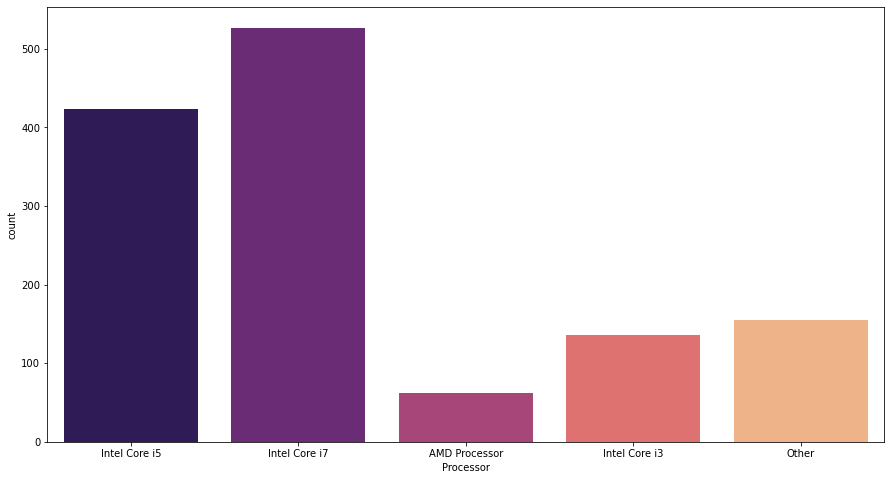

In [1226]:
# Plotting types of Processors
plt.figure(figsize=(15,8))
sn.countplot(df['Processor'], palette='magma')

<AxesSubplot:xlabel='Processor', ylabel='Price'>

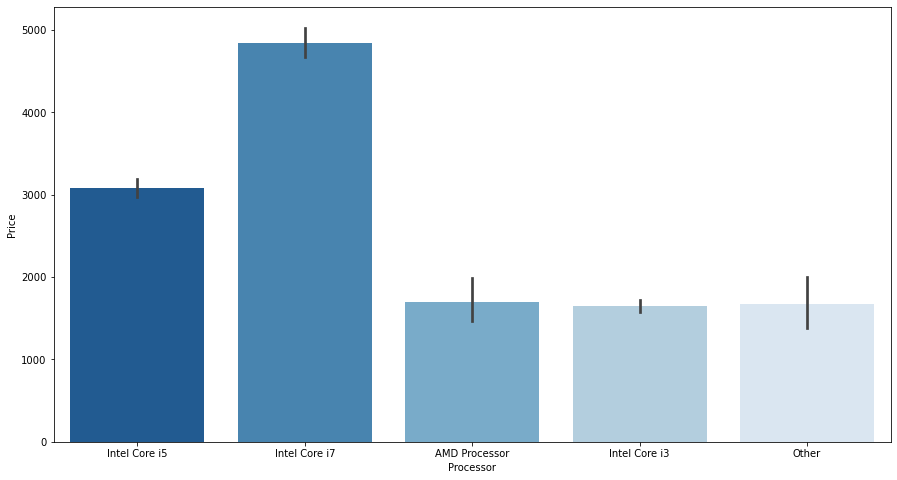

In [1227]:
# Plotting Laptop Prices based on Processor
plt.figure(figsize=(15,8))
sn.barplot(x = df['Processor'], y = df['Price'], palette = 'Blues_r')

As shown in the graph above, i7 tends to be the most expensive followed by i5. This was then followed by i3, AMD and other processors that are which are relatively the same price.

In [1228]:
# Dropping Cpu Column
df.drop(columns=['Cpu'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5


### Analysis on RAM Column

An in-depth analysis on the RAM column be essential as the RAM column has a 75% positive correlation with the price.

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

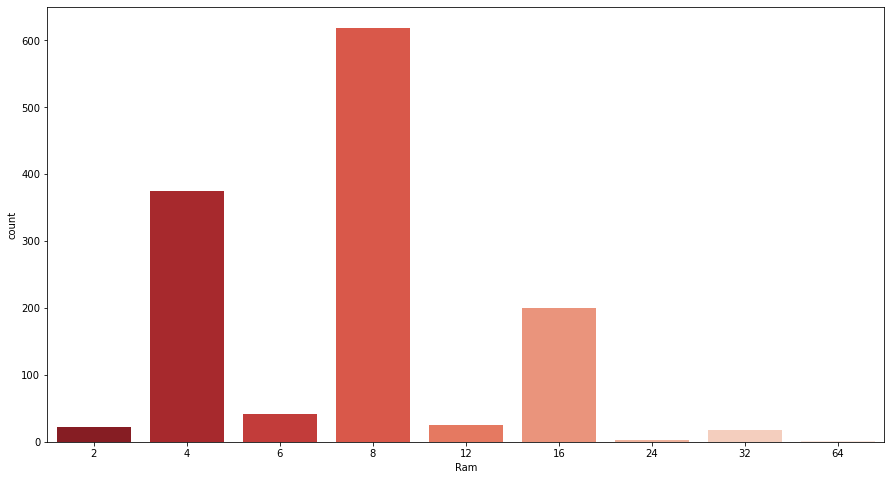

In [1229]:
plt.figure(figsize=(15,8))
sn.countplot(df['Ram'], palette='Reds_r')

In [1230]:
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

As illustrated above, the most frequently used Ram is 8GB, followed by 4GB. This may vary based on the user's requirements and preferences.

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

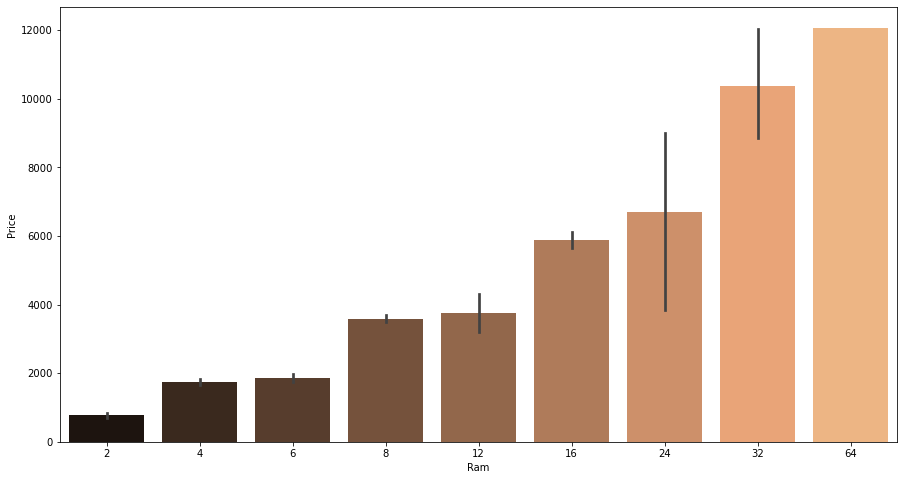

In [1231]:
# Plotting Laptop Prices based on RAM
plt.figure(figsize=(15,8))
sn.barplot(df['Ram'], df['Price'], palette='copper')

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='Price'>

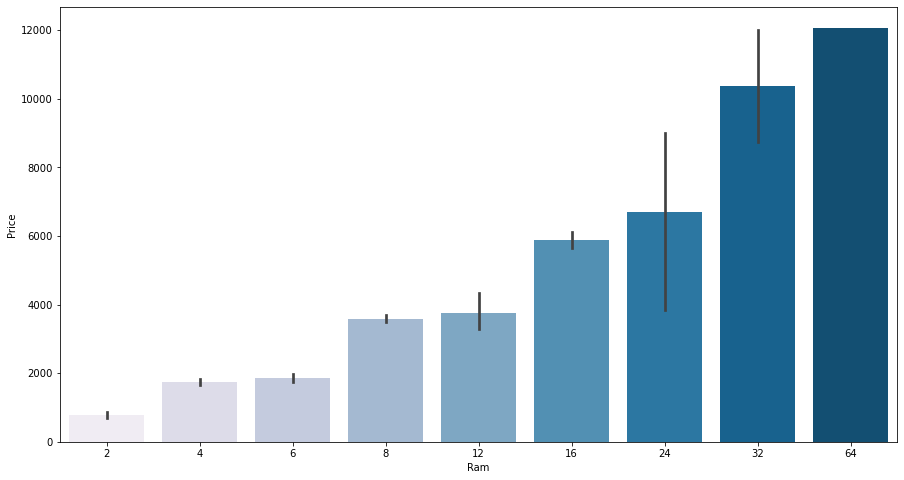

In [1232]:
# Plotting the relationship between RAM and Price
plt.figure(figsize=(15,8))
sn.barplot(df['Ram'], df['Price'], palette = 'PuBu')

The bar graph above clearly shows the relationship between the RAM and the Price of the Laptop consisting the specified RAM. As proven, there is a strong positive correlation between the 2 variables allowing RAM to be a vital factor to be considered when determining a Laptop's Price.

The graph above also shows that laptops with 24GB RAM have the widest range in Price ranging from RM 4000 to around RM 9500. Additionally, we can also see that laptops with 64GB RAM are most likely to have a price of 12000RM with the lowest variation in price. This could also be due to a lack of laptops with 64GB RAM within the dataset.

### Analysis on Memory Column

Since the Memory column consists of a wide variety of storage options from SSD, HDD, Flash and Hybrid, this column would have to be analyzed and processed to ensure the accuracy of the precition. 

In [1233]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
240GB SSD                          1
1

In [1234]:
# Converting Decimal Values to Whole (1.0TB to 1TB)
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

# Converting TB to GB (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000GB')

# Replacing GB with ""
df['Memory'] = df['Memory'].str.replace('GB', '')

# Separating SSD and HDD in Hybrid Devices
storage = df['Memory'].str.split('+', n=1, expand = True)
storage

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [1235]:
# Removing Blank Spaces from storage[0]
df['storage1'] = storage[0]
df['storage1'] = df['storage1'].str.replace(' ', '')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,storage1
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5,128SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5,128FlashStorage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5,256SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7,512SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5,256SSD


In [1236]:
# Function to set 1 based on storage1 Type
def storage_classification(value):
    df['storage1_' + value] = df['storage1'].apply(lambda x:1 if value in x else 0)
    

In [1237]:
memory_list = ['HDD', 'SSD', 'Hybrid', 'FlashStorage']

for value in memory_list:
    storage_classification(value)
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,storage1,storage1_HDD,storage1_SSD,storage1_Hybrid,storage1_FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5,128SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5,128FlashStorage,0,0,0,1
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5,256SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7,512SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5,256SSD,0,1,0,0


In [1238]:
# Keep Storage Space (Int Value) and Remove Char Values
df['storage1'] = df['storage1'].str.replace(r'\D', '')
df['storage1'].value_counts()

C:\Users\tuans\AppData\Local\Temp/ipykernel_6840/194634699.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['storage1'] = df['storage1'].str.replace(r'\D', '')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
508       1
8         1
240       1
Name: storage1, dtype: int64

In [1239]:
# Working with storage[1]
df['storage2'] = storage[1]
df['storage1'] = df['storage1'].str.replace(' ', '')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,storage1,storage1_HDD,storage1_SSD,storage1_Hybrid,storage1_FlashStorage,storage2
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [1240]:
def storage_classification2(value):
    df['storage2_' + value] = df['storage2'].apply(lambda x:1 if value in x else 0)
    

In [1241]:
# Replacing null values with 0
df['storage2'] = df['storage2'].fillna('0')

In [1242]:
df['storage2'].value_counts()

0                1095
  1000 HDD        185
  2000 HDD         15
  256 SSD           3
  500 HDD           2
  1000 Hybrid       2
  512 SSD           1
Name: storage2, dtype: int64

In [1243]:
for value in memory_list:
    storage_classification2(value)

In [1244]:
# Keep Storage Space (Int Value) and Remove Char Values
df['storage2'] = df['storage2'].str.replace(r'\D', '')
df['storage2'].value_counts()

C:\Users\tuans\AppData\Local\Temp/ipykernel_6840/1168686245.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['storage2'] = df['storage2'].str.replace(r'\D', '')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: storage2, dtype: int64

In [1245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                1303 non-null   object 
 1   TypeName               1303 non-null   object 
 2   Ram                    1303 non-null   int32  
 3   Memory                 1303 non-null   object 
 4   Gpu                    1303 non-null   object 
 5   OpSys                  1303 non-null   object 
 6   Weight                 1303 non-null   float64
 7   Price                  1303 non-null   float64
 8   TouchScreen            1303 non-null   int64  
 9   IPS                    1303 non-null   int64  
 10  PPI                    1303 non-null   float64
 11  Processor              1303 non-null   object 
 12  storage1               1303 non-null   object 
 13  storage1_HDD           1303 non-null   int64  
 14  storage1_SSD           1303 non-null   int64  
 15  stor

In [1246]:
# Converting storage1 and storage2 to int
df['storage1'] = df['storage1'].astype('int')
df['storage2'] = df['storage2'].astype('int')

In [1247]:
# Combining storage2 & storage1 based on storage type
df['HDD'] = ((df['storage1'] * df['storage1_HDD']) + (df['storage2'] * df['storage2_HDD']))
df['SSD'] = ((df['storage1'] * df['storage1_SSD']) + (df['storage2'] * df['storage2_SSD']))
df['Flash_Storage'] = ((df['storage1'] * df['storage1_FlashStorage']) + (df['storage2'] * df['storage2_FlashStorage']))
df['Hybrid'] = ((df['storage1'] * df['storage1_Hybrid']) + (df['storage2'] * df['storage2_Hybrid']))
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,storage1_FlashStorage,storage2,storage2_HDD,storage2_SSD,storage2_Hybrid,storage2_FlashStorage,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,4068.584942,0,1,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,2730.044822,0,0,...,1,0,0,0,0,0,0,0,128,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,1746.252000,0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,7706.134152,0,1,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,5477.461056,0,1,...,0,0,0,0,0,0,0,256,0,0


In [1248]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'Processor', 'storage1',
       'storage1_HDD', 'storage1_SSD', 'storage1_Hybrid',
       'storage1_FlashStorage', 'storage2', 'storage2_HDD', 'storage2_SSD',
       'storage2_Hybrid', 'storage2_FlashStorage', 'HDD', 'SSD',
       'Flash_Storage', 'Hybrid'],
      dtype='object')

In [1249]:
# Dropping unnecessary columns
df.drop(columns=['Memory', 'storage1', 'storage1_HDD', 'storage1_SSD', 'storage1_Hybrid',
       'storage1_FlashStorage', 'storage2', 'storage2_HDD', 'storage2_SSD',
       'storage2_Hybrid', 'storage2_FlashStorage'], inplace=True)

In [1250]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Flash_Storage,Hybrid
745,Acer,Notebook,2,Intel HD Graphics 400,Chrome OS,1.68,1002.19680,0,0,111.935204,Other,0,0,32,0
447,Dell,Workstation,8,Nvidia Quadro M620,Windows 10,2.23,6052.66128,0,0,141.211998,Other,1000,0,64,0
222,Toshiba,Ultrabook,8,Intel HD Graphics 520,Windows 10,1.20,4139.37648,0,0,165.632118,Intel Core i7,0,256,0,0
1009,HP,Notebook,4,Intel HD Graphics 620,Windows 10,1.64,2077.28064,0,0,111.935204,Intel Core i3,500,0,0,0
772,Toshiba,Notebook,4,Intel HD Graphics 520,Windows 10,1.75,3097.69920,0,1,111.935204,Intel Core i5,0,128,0,0


In [1251]:
df.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Ram              0.743007
SSD              0.670799
PPI              0.473487
IPS              0.252208
Weight           0.210370
TouchScreen      0.191226
Hybrid           0.007989
Flash_Storage   -0.040511
HDD             -0.096441
Name: Price, dtype: float64

Once completing the pre-processing stage, we can conclude that laptops with **SSD** are more likely to be expensive based on the analysis performed on the dataset. It can also be observed that Flash Storage and HDD are negatively correlated with Price as these may be outdated forms of storage and the Price tends to decrease among Laptops with only HDD or Flash Storage.

## Analysis on GPU Column

In [1252]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

Since consumers are more likely to focus on the Manufacturer prior to looking at the model, we shall put in more emphasis on the GPU Manufacturer throughout this Analysis. 

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_manu', ylabel='count'>

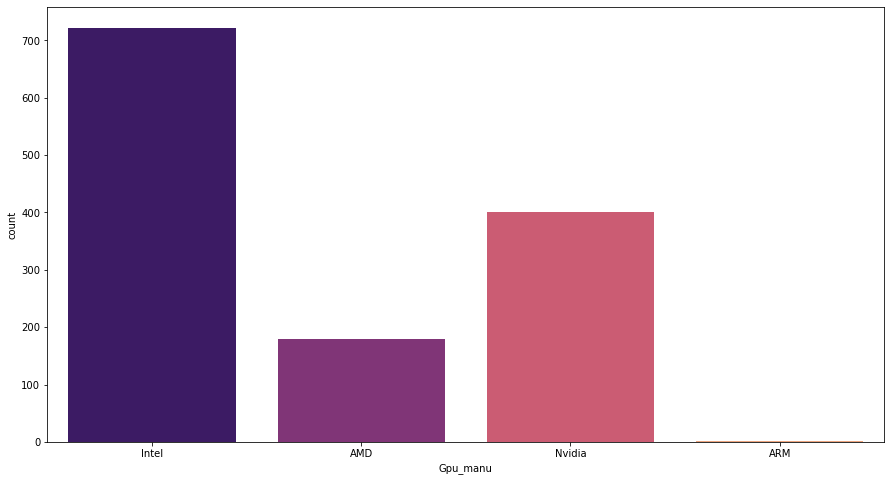

In [1253]:
# Extracting Manufacturer Name / Brand into a new comlumn
df['Gpu_manu'] = df['Gpu'].apply(lambda x:x.split()[0])

plt.figure(figsize=(15,8))
sn.countplot(df['Gpu_manu'], palette = 'magma')

In [1254]:
df['Gpu_manu'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_manu, dtype: int64

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_manu', ylabel='count'>

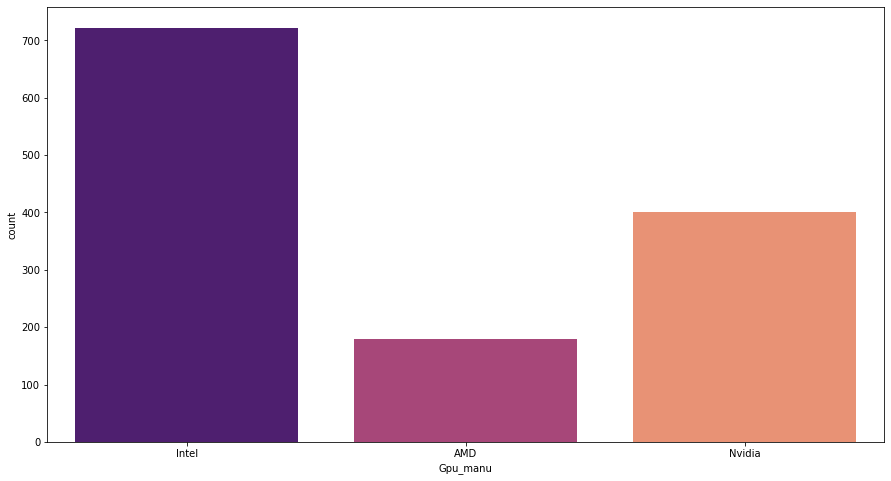

In [1255]:
# Dropping ARM as only 1 laptop within Dataset contains ARM 
df = df[df['Gpu_manu'] != 'ARM']

plt.figure(figsize=(15,8))
sn.countplot(df['Gpu_manu'], palette = 'magma')

In [1256]:
df['Gpu_manu'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_manu, dtype: int64

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu_manu', ylabel='Price'>

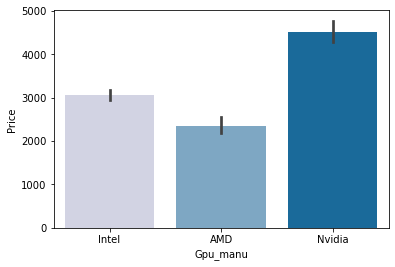

In [1257]:
# Checking variation in price based on GPU
sn.barplot(df['Gpu_manu'], df['Price'], estimator = np.mean, palette = 'PuBu')

As illustrated by the graph above, laptops with Nvidia GPU tends to be more expensive in comparison to Intel and AMD.

In [1258]:
# Dropping 'Gpu' Column as it's no longer required
df = df.drop(columns = ['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Flash_Storage,Hybrid,Gpu_manu
0,Apple,Ultrabook,8,macOS,1.37,4068.584942,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,macOS,1.34,2730.044822,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,No OS,1.86,1746.252000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,macOS,1.83,7706.134152,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,macOS,1.37,5477.461056,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


## Analysis on OpSys Column

In [1259]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [1260]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

As shown above, some Operating Systems are updated versions of each other, these include Windows 10, which is an updated version of Windows 7 and so on. These can be merged based on the OS to make the prediction process more efficient and accurate.

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='Price'>

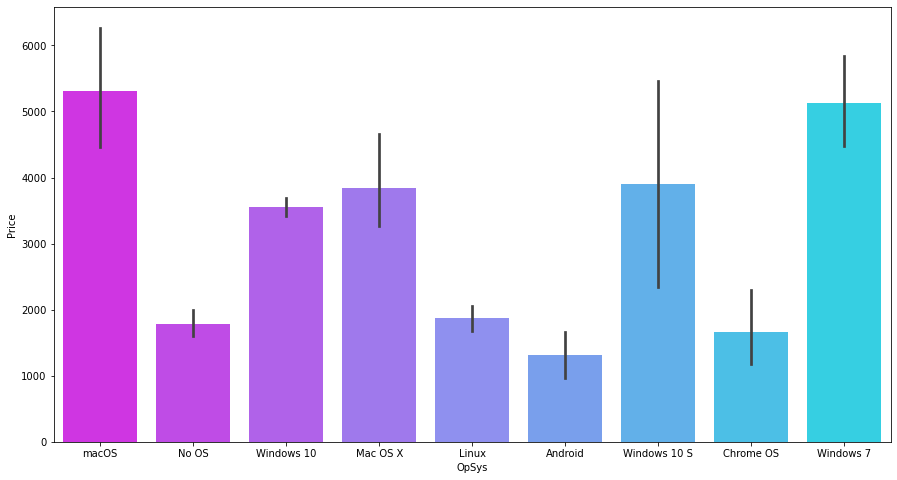

In [1261]:
# Variation in Price based on OS
plt.figure(figsize=(15,8))
sn.barplot(df['OpSys'], df['Price'], palette = 'cool_r')

### Classify OS

In [1262]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [1263]:
# Function to categorize OS
def set_OS(text):
    
    if text == "Windows 10" or text == "Windows 10 S" or text == "Windows 7":
        return 'Windows'
    
    elif text == "Mac OS X" or text == "macOS":
        return 'Mac'
    
    else:
        return 'Other'

In [1264]:
df['OpSys'] = df['OpSys'].apply(lambda x:set_OS(x))
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Flash_Storage,Hybrid,Gpu_manu
0,Apple,Ultrabook,8,Mac,1.37,4068.584942,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,2730.044822,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Other,1.86,1746.252000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,7706.134152,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,5477.461056,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [1265]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Processor,HDD,SSD,Flash_Storage,Hybrid,Gpu_manu
1274,Asus,Notebook,4,Windows,2.20,1120.63824,0,0,100.454670,Other,500,0,0,0,Intel
1162,HP,Gaming,8,Windows,2.62,2730.22704,0,1,141.211998,Intel Core i7,1000,0,0,0,Nvidia
727,Dell,2 in 1 Convertible,4,Windows,1.71,1970.98704,1,0,165.632118,Intel Core i3,1000,0,0,0,Intel
500,Asus,Netbook,4,Windows,1.20,1032.56640,0,0,135.094211,Other,0,0,64,0,Intel
844,HP,Ultrabook,8,Windows,1.54,5679.11520,0,0,157.350512,Intel Core i7,0,512,0,0,Intel


C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='count'>

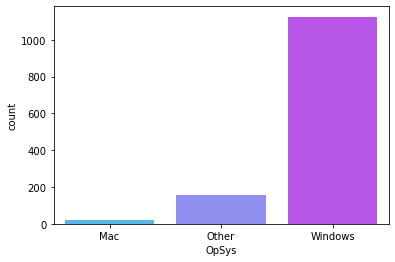

In [1266]:
sn.countplot(df['OpSys'], palette='cool')

In [1267]:
df['OpSys'].value_counts()

Windows    1125
Other       156
Mac          21
Name: OpSys, dtype: int64

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSys', ylabel='Price'>

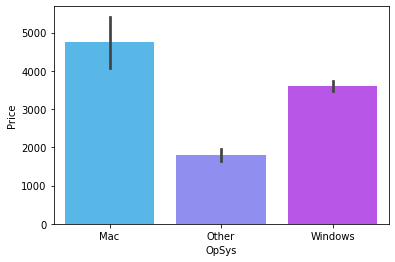

In [1268]:
# Identifying the variation in Price among the 3 categories
sn.barplot(df['OpSys'], df['Price'], palette = 'cool')

Based on the bar plot above, we can identify that Laptops with Mac OS tend to be more expensive ranging between RM 4000 to RM 5700. This is followed by Windows and Other OS. 

## Analysis on Weight

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

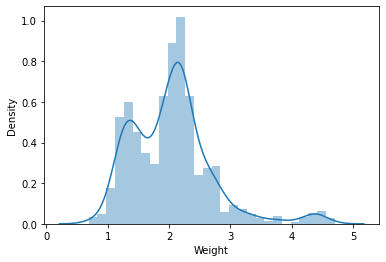

In [1269]:
sn.distplot(df['Weight'])

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='Price'>

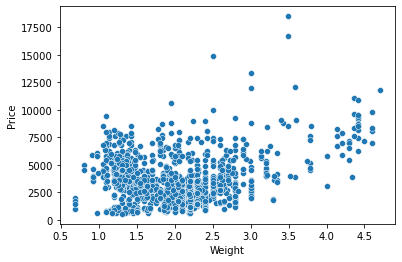

In [1270]:
sn.scatterplot(df['Weight'], df['Price'])

Based on the analysis performed on Weight, we can determine that most laptops within the dataset range within 1.0 kg to 3.0 kg at a price range below RM 10000. This could be due to the fact that the majority of the consumers require laptops for day-to-day tasks and not require any heavy usage to be performed.

### Price Analysis

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

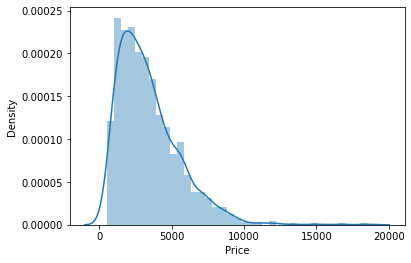

In [1271]:
sn.distplot(df['Price'])

Since the Price column is Left Skewed, we shall run the code below to get Gaussian Distribution.

C:\Users\tuans\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

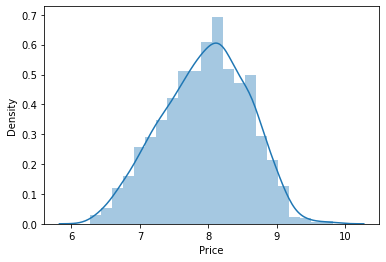

In [1272]:
sn.distplot(np.log(df['Price']))

### Identifying Correlation with Price

In [1273]:
df.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Ram              0.742905
SSD              0.670660
PPI              0.475368
IPS              0.253320
Weight           0.209867
TouchScreen      0.192917
Hybrid           0.007942
Flash_Storage   -0.040067
HDD             -0.096891
Name: Price, dtype: float64

<AxesSubplot:>

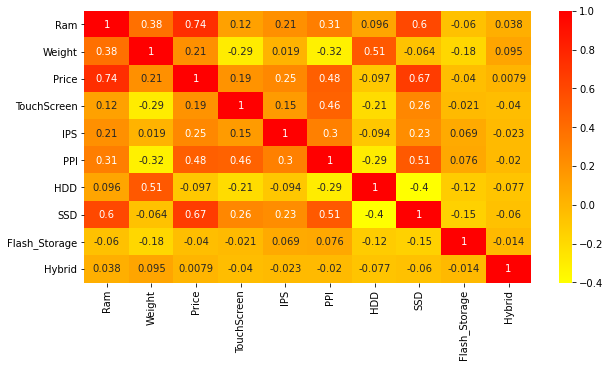

In [1274]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(), annot=True, cmap='autumn_r')

## Develop ML Model

In [1275]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [1276]:
train_data = df.drop(['Price'], axis=1)
test_data = np.log(df['Price'])

In [1277]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size = 0.2, random_state = 5)

### Convert Categorical Variables into Numbers

In [1278]:
# Converting Categorical Variables into Numbers for better processing
mapper = {i: value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'Processor',
 9: 'HDD',
 10: 'SSD',
 11: 'Flash_Storage',
 12: 'Hybrid',
 13: 'Gpu_manu'}

## Linear Regression

In [1279]:
# Applying One Hot Encoding on Categorical Variables 
# Remainder='Passthrough' to ensure only the column transforming is effected
ct = ColumnTransformer(transformers=[('col_transform', OneHotEncoder(sparse=False, drop='first'), [0, 1, 3, 8, 13])], remainder='passthrough')
Lin_reg = LinearRegression()
pipe = Pipeline([('ct', ct), ('Lin_reg', Lin_reg)])

In [1280]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1281]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.8293540072522958
MAE: 0.20659742983726367


In [1282]:
np.exp(0.20659742983726367)

1.2294875171504656

## Lasso Regression

In [1283]:
Lasso_reg = Lasso(alpha=0.001)

pipe = Pipeline([('ct', ct), ('Lasso_reg', Lasso_reg)])

In [1284]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1285]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.8245620071849699
MAE: 0.2123401236337087


In [1286]:
np.exp(0.2123401236337087)

1.236568399698404

## Ridge Regression

In [1287]:
Ridge_reg = Ridge(alpha=10)

pipe = Pipeline([('ct', ct), ('Ridge_reg', Ridge_reg)])

In [1288]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1289]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.8208700488845084
MAE: 0.21352399014303602


In [1290]:
np.exp(0.21352399014303602)

1.2380331985053437

## Decision Tree

In [1291]:
d_tree = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('ct', ct), ('d_tree', d_tree)])

In [1292]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1293]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.8593866562049677
MAE: 0.18933480262717012


In [1294]:
np.exp(0.18636584705821863)

1.2048629753306608

## Random Forest

In [1295]:
ran_forest = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5,
                              max_features=0.75, max_depth=15)

pipe = Pipeline([('ct', ct), ('ran_forest', ran_forest)])

In [1296]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [1297]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

R2 Score: 0.9075332274916128
MAE: 0.15223497098555694


In [1298]:
np.exp(0.15223497098555694)

1.1644338124501676

Among the algorithms applied, the one with the highest accuracy was **Random Forest** with an accuracy of **90.75%**. Hence, Random Forest would be implemented, Hyperparameter Tuning is then performed to further improve the accuracy of the prediction.

In [1299]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [1300]:
train_data.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,Processor,HDD,SSD,Flash_Storage,Hybrid,Gpu_manu
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,128,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [1301]:
train_data.to_csv('trained_data.csv',index=None)

## Hyperparameter Tuning

In [1302]:
index_list = [0, 1, 3, 8, 13]
transform_list = []

for key, value in mapper.items():
    if key in index_list:
        transform_list.append(value)
        
transform_list

['Company', 'TypeName', 'OpSys', 'Processor', 'Gpu_manu']

In [1303]:
train_data = pd.get_dummies(train_data, columns=transform_list, drop_first=True)
train_data.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Flash_Storage,Hybrid,Company_Apple,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,Processor_Intel Core i3,Processor_Intel Core i5,Processor_Intel Core i7,Processor_Other,Gpu_manu_Intel,Gpu_manu_Nvidia
0,8,1.37,0,1,226.983005,0,128,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1,8,1.34,0,0,127.677940,0,0,128,0,1,...,1,0,0,0,0,1,0,0,1,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16,1.83,0,1,220.534624,0,512,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,8,1.37,0,1,226.983005,0,256,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [1304]:
X_train, X_test, y_train, y_test = train_test_split(train_data, test_data, test_size=0.15, random_state=2)

X_train.shape, X_test.shape

((1106, 40), (196, 40))

In [ ]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)
plt.figure(figsize = (16,9))
tree.plot_tree(reg, filled=True, feature_names = train_data.columns)

[Text(438.8729468053044, 478.60434782608695, 'Ram <= 7.0\nmse = 0.39\nsamples = 1106\nvalue = 7.956'),
 Text(199.02597950572635, 457.3330434782609, 'Processor_Other <= 0.5\nmse = 0.192\nsamples = 362\nvalue = 7.345'),
 Text(131.0553496081977, 436.0617391304348, 'Processor_Intel Core i5 <= 0.5\nmse = 0.13\nsamples = 256\nvalue = 7.522'),
 Text(86.84764918625679, 414.7904347826087, 'Processor_Intel Core i7 <= 0.5\nmse = 0.08\nsamples = 154\nvalue = 7.368'),
 Text(36.28625678119349, 393.5191304347826, 'Weight <= 1.645\nmse = 0.07\nsamples = 135\nvalue = 7.318'),
 Text(5.740325497287523, 372.24782608695654, 'TypeName_Ultrabook <= 0.5\nmse = 0.064\nsamples = 10\nvalue = 7.722'),
 Text(3.8268836648583484, 350.9765217391304, 'Weight <= 1.395\nmse = 0.02\nsamples = 8\nvalue = 7.613'),
 Text(2.8701627486437613, 329.70521739130436, 'mse = 0.0\nsamples = 1\nvalue = 7.343'),
 Text(4.783604581072936, 329.70521739130436, 'Company_Lenovo <= 0.5\nmse = 0.011\nsamples = 7\nvalue = 7.651'),
 Text(3.8268

As we can see, the decision trees plotted are extensive and inefficient due to overfitting. This would also consume a much larger computational power. In order to overcome this, we could apply pruning to make the process more efficient.

In [ ]:
# Cost Complexity Pruning
path = reg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [ ]:
alpha_list = []

for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alpha_list.append(reg)

In [ ]:
# Calculating Training & Testing Score
train_score = [reg.score(X_train, y_train) for reg in alpha_list]
test_score = [reg.score(X_test, y_test) for reg in alpha_list]

In [ ]:
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas, train_score, marker = 'o',
         label = 'training', color = 'blue')

plt.plot(ccp_alphas, test_score, marker = '+',
         label = 'testing', color = 'red', drawstyle='steps-post')

plt.legend()
plt.show()

Possible alpha values can lie between **0.002** and **0.008**

In [ ]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg, filled=True, feature_names=train_data.columns)

Upon implementing Cost Complexity Pruning, the decision tree now consists of much lesser nodes, allowing it to be more efficient and less complicated.

In [ ]:
params = {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ["mse", "mae"],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    },
    'Decision Tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion': ["mse", "mae"],
            'max_depth': [int(x) for x in np.linspace(1, 30, 5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2, 5, 10, 14],
            'min_samples_leaf': [2, 5, 10, 14],
        }
    }
}

In [ ]:
scores = []

for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'], param_distributions = mp['params'], cv=5,
                            n_iter=10, scoring='neg_mean_squared_error', verbose=2)
    clf.fit(X_train, y_train)
    
    # Storing Dictionary within a List
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })

In [ ]:
# Converting dictionary keys and values into columns
scores_df = pd.DataFrame(scores, columns = ['model_name', 'best_score', 'best_estimator'])
scores_df

In [ ]:
scores

In [ ]:
rf = RandomForestRegressor(ccp_alpha=0.005, criterion='mae', max_depth=15,
                        max_features='log2', min_samples_leaf=5,
                        min_samples_split=14, n_estimators=955)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

## Final Prediction on entire Dataset

Since the accuracy after hyperparameter tuning drops from 90% to 81% for the Random Forest Model, we shall use the initial Random Forest model in the final system to get the best prediction.

In [ ]:
predicted = []
test_train = np.array(train_data)

for i in range(len(test_train)):
    predicted.append(rf.predict([test_train[i]]))
    
predicted

Since the values in the 'predicted' array is the log value of the predicted Price, this would have to be converted back to the Price.

In [ ]:
pred_price = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(pred_price)
df.head()

## Plotting Actual vs Predicted Price

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

As proven, the prediction is not as too accurate.As shown, the predicted price merely reaches the Actual median Price (RM 10000). Hence, the following blocks of code would be run.

## Random Forest v2.0

In [ ]:
rf1 = RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5,
                            max_features=0.75, max_depth=15)

In [ ]:
rf1.fit(X_train, y_train)
rf1_r2_score = metrics.r2_score(y_test, rf1.predict(X_test)) * 100
print(f'R2 Score:', round(rf1_r2_score,1), '%')

The R2 Score is much higher as shown at **88.8%**. This suggests that the the new Random Forest Regressor would be most suitable in order to get the most accurate prediction.

In [ ]:
predicted = []
test_train = np.array(train_data)

for i in range(len(test_train)):
    predicted.append(rf1.predict([test_train[i]]))
    
predicted

In [ ]:
pred_price = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(pred_price)
df.head()

## Plotting Actual vs Predicted Price

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

As seen above, the actual price and predicted value follow the similar trend. This further confirms that the Random Forest Regressor v2.0 Model deems to be the best fit to predict the Laptop Prices in Malaysia. 

## Saving the ML Model

In [ ]:
import pickle
file = open('laptop_price_pred_v2.pk1', 'wb')
pickle.dump(rf1, file)
file.close()